In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [30]:
df = pd.read_csv("C:\\SEM-4\\MachineLearning_LAB\\Lab9_IMDB Dataset.csv");

In [31]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [32]:
# Convert sentiments to numerical labels
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [33]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [34]:
import re
import string

In [35]:
# Function for text preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    words = text.split()  # Tokenization (split by space)
    return " ".join(words)

In [36]:
# Apply preprocessing
df["cleaned_review"] = df["review"].apply(preprocess_text)

In [37]:
df["cleaned_review"]

0        one of the other reviewers has mentioned that ...
1        a wonderful little production br br the filmin...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: cleaned_review, Length: 50000, dtype: object

In [38]:
# Split data into training and test sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(df["cleaned_review"], df["sentiment"], test_size=0.2, random_state=42)


In [39]:
text_clf = Pipeline([
    ('vectorizer', CountVectorizer(max_features=5000,stop_words="english")),  # Convert text into Bag of Words
    ('tfidf', TfidfTransformer()),  # Apply TF-IDF transformation
    ('classifier', MultinomialNB())  # Train using Multinomial Naïve Bayes
])


In [40]:
text_clf

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_features=5000, stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [41]:
# Train the classifier
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_features=5000, stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [42]:
# Make predictions on the test set
y_pred = text_clf.predict(X_test)

In [43]:
y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [44]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Accuracy Score: 0.8479


In [45]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(conf_matrix, index=["Negative", "Positive"], columns=["Negative", "Positive"])

In [46]:
conf_matrix

array([[4195,  766],
       [ 755, 4284]], dtype=int64)

In [47]:
df_cm

,Negative,Positive
Negative,4195,766
Positive,755,4284


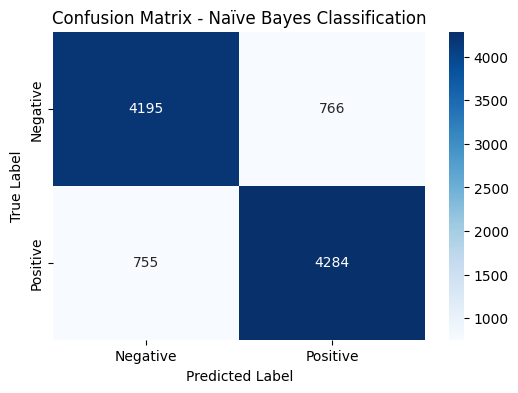

In [48]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naïve Bayes Classification")
plt.show()

In [49]:
# New movie reviews for testing
new_reviews = [
    "The script and direction were absolutely brilliant.",
    "I regret watching this dull and predictable movie.",
    "A heartwarming story with great character development."
]

# Make predictions on new reviews
predicted_labels = text_clf.predict(new_reviews)


In [50]:
# Print predictions
for review, label in zip(new_reviews, predicted_labels):
    sentiment = "Positive" if label == 1 else "Negative"
    print(f"'{review}' -> Predicted Sentiment: {sentiment}")


'The script and direction were absolutely brilliant.' -> Predicted Sentiment: Positive
'I regret watching this dull and predictable movie.' -> Predicted Sentiment: Negative
'A heartwarming story with great character development.' -> Predicted Sentiment: Positive
